<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Files-an" data-toc-modified-id="Files-an-1">Files an</a></span></li><li><span><a href="#Download-data-file" data-toc-modified-id="Download-data-file-2">Download data file</a></span></li><li><span><a href="#Load-data-into-Rstudio" data-toc-modified-id="Load-data-into-Rstudio-3">Load data into <code>Rstudio</code></a></span></li></ul></div>

## Files an

To be compatible with the statistics you learn in year 1 (in The Geography Department), we will make use of the language `R` and the package `Rstudio` for statistics.

You will probably need to install software for these. 

In particular, you need:

1. Download and install R from [`https://cran.rstudio.com`](https://cran.rstudio.com)
2. Download and install RStudio from [`https://www.rstudio.com`](https://www.rstudio.com/products/rstudio/download/#download)




## Download data file

Download the file [`Guandong_Yearbook_2019.csv`](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv) from [`http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv`](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv) and save it in the area where you are doing your work.

## Load data into `Rstudio`

Next, start `Rstudio`, locate your data directory, and import the file `Guangdong-Yearbook-2019.csv`:

![](images/rstudio1.png)

![](images/rstudio2.png)



In [21]:
## These codes so we can run R code in the notebook ;-)
import rpy2.rinterface
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython



Call:
lm(formula = durban_land$d ~ x1 + x2 + x3 + x4 + x5, data = X2)

Residuals:
   Min     1Q Median     3Q    Max 
-77201 -18463   3039  22166  42794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1102788     512355   2.152   0.0421 *  
x1            351984      63185   5.571 1.15e-05 ***
x2            208057     156653   1.328   0.1972    
x3             84303      33266   2.534   0.0185 *  
x4           -195399      73633  -2.654   0.0142 *  
x5          25707500    3831148   6.710 7.61e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33230 on 23 degrees of freedom
Multiple R-squared:  0.9964,	Adjusted R-squared:  0.9957 
F-statistic:  1286 on 5 and 23 DF,  p-value: < 2.2e-16

integer(0)


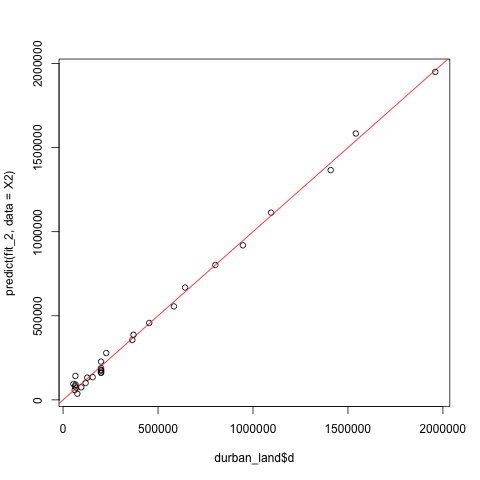

In [190]:
%%R


library(readr)
Guangdong_Yearbook_2019 <- read_csv("files/Guangdong-Yearbook-2019.csv")
##print(Guangdong_Yearbook_2019)

input = data.frame(year=Guangdong_Yearbook_2019$year,urban_land=600000+cumsum(c(9000,  75000,  61244,
           68756,  55000,  62833,  95232,  65646, 118748, 127541, 64909, 155614,  200000,
           200000,200000, 200000,200000, 200000,  227284, 364688, 370724, 453523, 583555, 
           642491,801795, 946852, 1095028,1408937, 1541491,1959820)))

input.agr_land = 2 * max(input$urban_land) - input$urban_land

X = data.frame(x1=Guangdong_Yearbook_2019$investment/Guangdong_Yearbook_2019$population,
               x2=Guangdong_Yearbook_2019$agr_output/Guangdong_Yearbook_2019$agr_pop,
               x3=log(Guangdong_Yearbook_2019$private_wage),
               x4=log(Guangdong_Yearbook_2019$avg_wage),
               x5=(Guangdong_Yearbook_2019$agr_output/input.agr_land)/
                  (Guangdong_Yearbook_2019$indust_output/input$urban_land))


dyear <- diff(input$year,differences = 1) 
year2 <- data.frame(year=input$year[c(1)] + cumsum(dyear))
#print(year2)
durban_land <- data.frame(year=year2$year,d=diff(input$urban_land,differences = 1))


## select all columns that match year2$year
X2 <- X[match(input$year,year2$year,nomatch=0),]

fit_2 <- lm(durban_land$d ~ x1 + x2 + x3 + x4 + x5, data=X2)
print(summary(fit_2))

plot(durban_land$d,predict(fit_2, data=X2)) + abline(0,1,col="red")